# Projectile Motion
> Harrison B. Prosper<br>
> February 2026 

## Learning objective

To learn how to use vectors to model a particle moving under the influence of gravity and a friction force and how to model the particle bouncing off a wall. 

## Tips

  * Use __esc r__ to disable a cell
  * Use __esc y__ to reactivate it
  * Use __esc m__ to go to markdown mode. **Markdown** is the typesetting language used in jupyter notebooks.
  * In a markdown cell, double tap the mouse or glide pad (on your laptop) to go to edit mode. 
  * Shift + return to execute a cell (including markdown cells).
  * If the equations don't typeset, try double tapping the cell again, and re-execute it.

### Import modules 
Make Python modules (that is, collections of programs) available to this notebook.

In [1]:
import os, sys
import numpy as np

## Introduction

### Gravitational field
According to Newton the **magnitude** of the force of gravity between two particles labeled 1 and 2 of mass $m_1$ and $m_2$, respectively, and a distance $r$ apart is given by
\begin{align}
    f_g & = G \frac{m_1 m_2}{r^2} ,
\end{align}
where $G = 6.67 \times 10^{-11} \text{ m}^3 \text{kg}^{-1}\text{s}^{-2}$ is Newton's gravitational constant. 

<img src="grav_force.png" align="left" alt="gravitational force" width="300"/>
Consider particle 1, of mass $m_1$. The magnitude of the force on particle 1 can be rewritten as
\begin{align}
    f_g & = m_1 g,\quad\text{ where } g  = \frac{G m_2}{r^2} .
\end{align}
The above expression can be interpreted using Michael Faraday's brilliant field concept. A <strong>field</strong>, which is typically invisible, is something that exists everywhere in space. It is described by attaching a mathematical entity at every point in space. If the entity is a single number, then we have a <strong>scalar field</strong>. If the entity is a vector, that is, a vector is attached at every point in space we have a <strong>vector field</strong>. The concept of a field is so powerful that the whole of modern physics is based on this concept.
<br clear="left"/> 

Suppose we treat the Sun as if it were a particle of mass $m_2$. (This turns out to be a very good approximation!)
Instead of assuming that the Sun exerts a force on the Earth across empty space, we assume that the Sun creates a **gravitational field** around (and within) it. It is the Sun's gravitational field at the location of particle 1 that generates the force on particle 1. (Newton would have been delighted with the concept of a field because he didn't care much for his own idea of <em>action at a distance</em>.)

But it is important to note that particle 1 also creates a gravitational field that extends all the way to the Sun and beyond! Suppose that you are particle 1. Then you create a gravitational field, albeit one much, much, weaker than the Sun's, throughout space. 
Therefore, in accordance with **Newton's 3rd law**, you (particle 1) exert a force on the Sun generated by your gravitational field, at the location of the Sun, of exactly the same magnitude, namely $f_g$, but in exactly the opposite direction to the force the Sun's field, at your location, exerts on you.

The gravitational field is a vector field; that is, the field is described by attaching a vector $\vec{g}$ at every point in space. If your mass is $m_1$, then the Sun's gravitational field at your location generates a force on you given by
\begin{align}
     \vec{f}_g & = m_1 \vec{g}.
\end{align}
Since $\vec{f}_g$ is a force, and **Newton's 2nd law** is $\vec{F} = m \vec{a}$, it follows that the units of the gravitational field $\vec{g}$ are those of acceleration, namely, $\text{m} / \text{s}^2$.

The Sun's field at your location points **towards** the source of the field, namely, the Sun. Likewise, the Earth creates a gravitational field that extends in all directions throughout space. The Earth's gravitational field at your location points towards the center of the Earth.  The total gravitational field at your location is simply the vector sum of the gravitational fields of everything that has mass!


### Projectile Motion
In **Exercise 3**, you will study a projectile (a tennis ball) subject to two forces: 1) the force of gravity and 2) a friction force.

The **gravitational force** on a particle of mass $m$ near the Earth's surface is given by 
\begin{align}
\vec{f}_g & = m \vec{g}, \quad\text{ where } \vec{g} = -\frac{G M_E}{R_E^2} \, \hat{r} ,
\end{align}
$M_E$ is the mass of the Earth, $R_E$ is the Earth's radius, and $\hat{r}$ is a unit vector that points from the *center of the Earth to the particle*.

We'll assume a **friction force** given by 
\begin{align}
\vec{f} & = -\frac{1}{\tau}m \vec{v},
\end{align}
where $\vec{v}$ is the particle's velocity and $\tau$ is a timescale that characterizes the strength of the friction force. Small values of $\tau$ correspond to a strong friction force, while large $\tau$ corresponds to a weak friction force. By the way, the vector $\vec{p} = m \vec{v}$ is called the **momentum** of the paricle.

For these simple forces, Newton's 2nd law 
\begin{align}
\vec{F} & = m \vec{a},\\
m\vec{g} - \frac{1}{\tau} m \vec{v} & = m \vec{a},\\
 \vec{g} - \frac{1}{\tau}\vec{v} & = \vec{a},
\end{align}
can be solved *exactly* for the position vector $\vec{r}(t)$ and velocity $\vec{v}(t)$ of the particle as a function of time $t$.

**Note**: $\vec{a} = d\vec{v} / dt$ and $\vec{v} = d\vec{r} / dt$.  Next week, we'll explore the meaning of the symbols $d\vec{v} / dt$ and $d\vec{r} / dt$. 

The exact solution of the equations
\begin{align}
 \frac{d\vec{v}}{dt} & = \vec{g} - \frac{1}{\tau}\vec{v},\\
 \frac{d\vec{r}}{dt} & = v ,
\end{align}
is 
\begin{align}
    \vec{r} & = \vec{r}_0 + \vec{v}_0 \,\left(1 - e^{-t / \tau} \right) \tau  + \vec{g} \left(\tau \, e^{-t / \tau} + t - \tau \right) \tau,\\
    \vec{v} & = \vec{v}_0 \, e^{-\alpha t / \tau} + \vec{g} \, \left(1 - e^{-t / \tau} \right) \tau,
\end{align}
where $\vec{r}_0$ and $\vec{v}_0$ are the initial position and velocity of the particle. 


The cell entitled **Using `sympy` to solve $\vec{F} = m \vec{a}$** shows how to solve (simple) differential equations with `sympy`.

## Using `sympy` to solve $\vec{F} = m \vec{a}$
\begin{align}
 \frac{d\vec{v}}{dt} & = \vec{g} - \frac{1}{\tau}\vec{v},\\
 \frac{d\vec{r}}{dt} & = v .
\end{align}

In [2]:
import sympy as sm
sm.init_printing() # Activate "pretty printing" of symbolic expressions

# Define symbols
r0,v0,g,t,tau = sm.symbols('r_0,v_0,g,t,\\tau')

# Define functions r(t) and v(t)
r = sm.Function('r')
v = sm.Function('v')

# Define the two differential equations
# Note: sm.diff(v(t), t) represents dv/dt, etc.
eq1 = sm.Eq(sm.diff(v(t), t), g - v(t) / tau)
eq2 = sm.Eq(sm.diff(r(t), t), v(t))

# Solve the two differential equaions simultaneously and
# specify the initial conditions r(0) = r0, v(0) = v0.
V, R = sm.dsolve((eq1, eq2), ics={r(0): r0, v(0):v0})

Solution for $\vec{r}(t)$

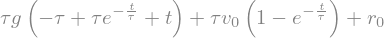

In [3]:
r = R.rhs.expand().collect(tau*v0).collect(tau*g)
r

Solution for $\vec{v}(t)$

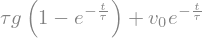

In [4]:
v = V.rhs.expand().collect(tau*g)
v

## Bouncing off a wall
When a particle bounces off a smooth wall, it behaves in the same way as a ray of light that bounces off a mirror: the angle of reflection is equal to the angle of incidence. 
<img src="bouncing.png" align="left" alt="bouncing off a wall" width="300"/>
The figure to the left shows the velocity, $\vec{v}$, of a particle as an arrow that touches a wall at the point $O$ where the particle is expected to strike the wall. The vector $\vec{u}$ is the velocity of the particle immediately after it bounces off the wall. 

The key assumption is that the *magnitude* of $\vec{u}$ immediately after the particle leaves point $O$ is the *same* as that of $\vec{v}$ immediately before impact. Consequently, $v = OC = u$, $AB = BC$, and the line segment from $A$  to $C$ is perpendicular to the wall and, therefore, in the same direction as the unit vector $\hat{n}$, which defines the wall's orientation.
<br clear="left"/> 

Notice that the vector from $C$ to $O$ is the same as the vector $\vec{u}$. Therefore, the vector from $C$ to $A$ plus the vector from $A$ to $O$ is equal the vector $\vec{u}$,
\begin{align}
    \vec{u} & = \vec{CA} + \vec{AO}, \\
        & = \vec{AO} + \vec{CA},\\
        & = \vec{v} + \vec{CA}.
\end{align}
Therefore, to complete the formula for $\vec{u}$ we need to find the vector $\vec{CA}$. The first point to note is that the length of $\vec{CA}$ is twice the length of the line segment $AB$. If one moves the unit vector $\hat{n}$ so that its tail is anchored at point $A$ then $AB = \vec{v}\cdot\hat{n}$, which is just $v \cos\theta$. Therefore, the magnitude of $\vec{CA}$ is $2 \vec{v}\cdot\hat{n}$. Finally, $\vec{CA}$ points in the direction $-\hat{n}$. Consequently, $\vec{CA} = - (2 \vec{v}\cdot\hat{n}) \hat{n}$ and we find,
\begin{align}
    \vec{u} 
        & = \vec{v} - (2 \vec{v}\cdot\hat{n}) \hat{n}.
\end{align}

Now that we have the vector $\vec{u}$, we need to find the point $O$, which is represented by the position vector $\vec{O}$. 
<img src="line.png" align="right" alt="equation of a line" width="300"/>
To that end, note that the equation of a line is given by 
\begin{align}
    \vec{r} & = \vec{c} + t \hat{u},
\end{align}
where $\vec{r}$ is the position vector of any point on the line, $\vec{c}$ is a fixed point on the line, the unit vector $\hat{u}$ gives the direction of the line, and $t$ is the coordinate (positive or negative) along the line relative to $\vec{c}$. 
<br clear="right"/>

Given the equation of a plane, 
\begin{align}
    \vec{r}\cdot\hat{n} & = d,
\end{align}
where $\vec{r}$ is the position vector of any point on the plane, the unit vector $\hat{n}$ gives the orientation of the plane, and $d$ is the $perpendicular$ distance of the plane from the origin,
we can find the vector $\vec{O}$ as follows. 
Taking the dot product of the equation of the line with $\hat{n}$ we find
\begin{align}
    \vec{r}\cdot\hat{n} & = \vec{c}\cdot\hat{n} + t \hat{u}\cdot\hat{n},\\
   d & = \vec{c}\cdot\hat{n} + t \hat{u}\cdot\hat{n},\\
   \therefore \quad t & = \frac{d - \vec{c}\cdot\hat{n}}{\hat{u}\cdot\hat{n}} \text{ provided that } \hat{u}\cdot\hat{n} \neq 0, \text{ and, consequently,} \\
   \vec{O} & = \vec{c} + t \hat{u}.
\end{align}